In [1]:
# Require the packages
require(ggplot2)
require(reshape2)
library(repr)

options(repr.plot.width=10.5, repr.plot.height=4.5)

Loading required package: ggplot2
Loading required package: reshape2


In [3]:
# Load the data
accuracies <- read.csv("data/accuracies_sensem_supervised.csv")
accuracies$metric <- "accuracy"
mcp <- read.csv("data/mcp_sensem_supervised.csv")
mcp$metric <- "mcp"
lcr <- read.csv("data/lcr_sensem_supervised.csv")
lcr$metric <- "lcr"

In [4]:
# Transform the data
accuracies.long <- melt(accuracies, id.vars = c("metric"), variable.name = "experiment", value.name = "result")
mcp.long <- melt(mcp, id.vars = c("metric"), variable.name = "experiment", value.name = "result")
lcr.long <- melt(lcr, id.vars = c("metric"), variable.name = "experiment", value.name = "result")
data <- rbind(accuracies.long, mcp.long)
data <- rbind(data, lcr.long)
data$experiment <- factor(data$experiment, levels=c("mfl", "bow_logreg", "bopos_logreg",
                                                    "pos_logreg", "wordvec_mlp_2_0", "wordvecpos_mlp_2_0"))
data$metric <- factor(data$metric, levels=c("accuracy", "mcp", "lcr"))
levels(data$metric) <- c("Accuracy", "Most Frequent Class Precision", "Less Frequent Classes Recall")

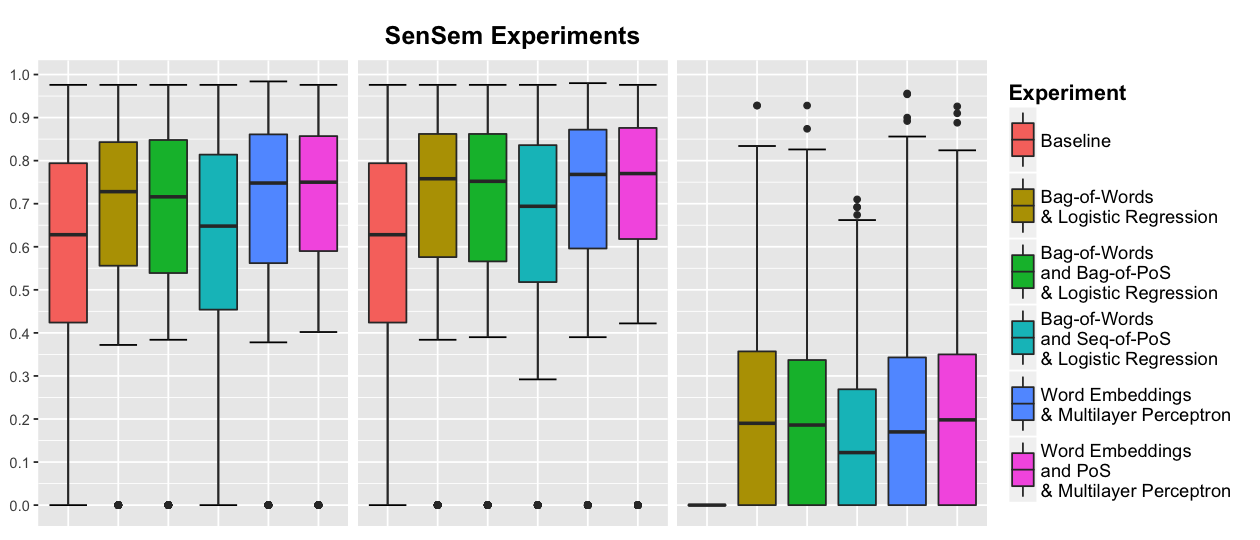

In [8]:
# Plot
p <- ggplot(data, aes(experiment, result))
p <- p + stat_boxplot(geom="errorbar")
p <- p + facet_wrap(~ metric)
p <- p + geom_boxplot(aes(fill=experiment))
p <- p + scale_y_continuous(breaks=seq(0, 1, 0.1))
p <- p + scale_fill_discrete(name="Experiment",
                      labels=c("Baseline",
                               "Bag-of-Words\n& Logistic Regression",
                               "Bag-of-Words\nand Bag-of-PoS\n& Logistic Regression",
                               "Bag-of-Words\nand Seq-of-PoS\n& Logistic Regression",
                               "Word Embeddings\n& Multilayer Perceptron",
                               "Word Embeddings\nand PoS\n& Multilayer Perceptron"))
p <- p + labs(title="SenSem Experiments")
p <- p + theme(
      plot.title=element_text(size=15, face="bold", margin=margin(10, 0, 10, 0), vjust=1, lineheight=0.6),
      strip.text.x=element_text(size=10),
      axis.title.x=element_blank(),
      axis.title.y=element_blank(),
      axis.ticks.x=element_blank(),
      axis.text.x=element_blank(),
      legend.title=element_text(face="bold", size=13),
      legend.text=element_text(size=11),
      legend.key.height=unit(2.75,"line")
  )
p

In [7]:
# Save the plot
ggsave("plots/sensem_supervised_results.png", plot=p, width=10.5, height=4.5)